In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, join_l_ab
import src.consts as c

from skimage import color

In [2]:
from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, join_l_ab
import src.consts as c

In [3]:
tf.__version__

'2.0.0'

In [4]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [5]:
def compare_model_label(model, inputs, ab):
    plt.figure(figsize=(10, 30))
    l = inputs[0]

    plt.subplot(1,3,1)
    plt.imshow(l[:,:,0], cmap=plt.cm.gray)

    plt.subplot(1,3,2)
    plt.imshow(join_l_ab(l, ab), cmap=plt.cm.binary)

    plt.subplot(1,3,3)
    print(l.shape, inputs[1].shape)
    output = model.predict( [ np.expand_dims(l, axis=0), np.expand_dims(inputs[1], axis=0) ] )

    plt.imshow(join_l_ab(l, output), cmap=plt.cm.binary)

    plt.show()

# Training

In [7]:
from src.model.train_model import train_model
from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, join_l_ab
import src.consts as c
TensorBoard(log_dir='/output')
model = train_model()

train images size 8366, valid images size 464, batch_size 4
Train for 5 steps, validate for 5 steps
Epoch 1/100
5/5 [==============================] - 35s 7s/step - loss: 0.0211 - accuracy: 0.5738 - val_loss: 0.0076 - val_accuracy: 0.6316
Epoch 2/100
5/5 [==============================] - 10s 2s/step - loss: 0.0183 - accuracy: 0.6048 - val_loss: 0.0075 - val_accuracy: 0.6317
Epoch 3/100
5/5 [==============================] - 11s 2s/step - loss: 0.0181 - accuracy: 0.6048 - val_loss: 0.0073 - val_accuracy: 0.6319
Epoch 4/100
5/5 [==============================] - 11s 2s/step - loss: 0.0174 - accuracy: 0.6058 - val_loss: 0.0077 - val_accuracy: 0.6335
Epoch 5/100
5/5 [==============================] - 10s 2s/step - loss: 0.0172 - accuracy: 0.6064 - val_loss: 0.0075 - val_accuracy: 0.6354
Epoch 6/100
5/5 [==============================] - 10s 2s/step - loss: 0.0168 - accuracy: 0.6063 - val_loss: 0.0074 - val_accuracy: 0.6354
Epoch 7/100
5/5 [==============================] - 10s 2s/step - l

In [8]:
print(train_model)

<function train_model at 0x7f6e85a688c0>


In [9]:
train_paths, _, test_paths = get_train_valid_test(c.DATASET_PATH)
test_data = create_tf_dataset(test_paths)

In [10]:
model.evaluate(test_data, steps=5)

5/5 [==============================] - 3s 605ms/step - loss: 0.0084 - accuracy: 0.7262


[0.008411517832428217, 0.7261566]

In [11]:
train_gen = image_generator(train_paths)
test_gen = image_generator(test_paths)

## Images from Train set

(256, 256, 1) (1000,)


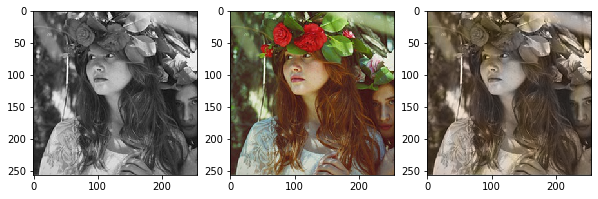

(256, 256, 1) (1000,)


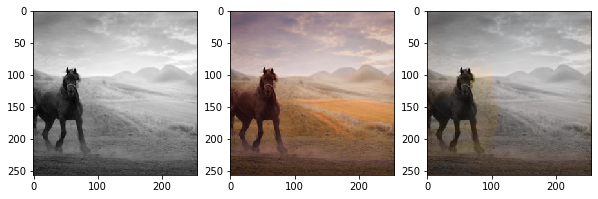

(256, 256, 1) (1000,)


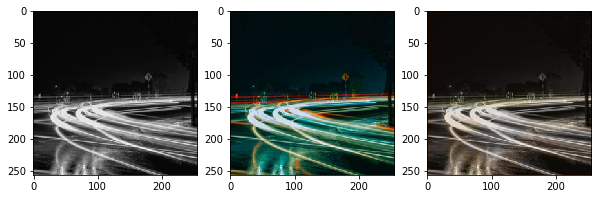

(256, 256, 1) (1000,)


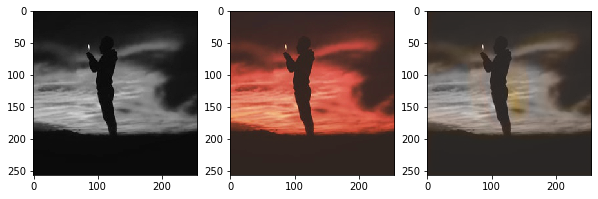

(256, 256, 1) (1000,)


/home/yimejky/neural-networks/venv/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 11 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


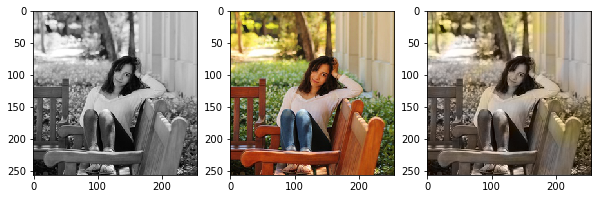

In [12]:
for i in range(5):
    inputs, ab = next(train_gen)
    compare_model_label(model, inputs, ab)

## Images from Test set

(256, 256, 1) (1000,)


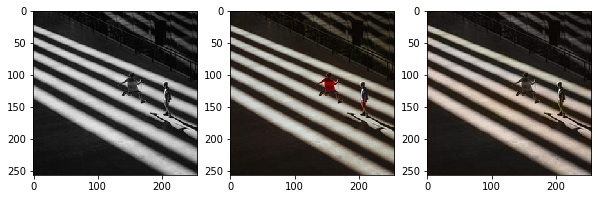

(256, 256, 1) (1000,)


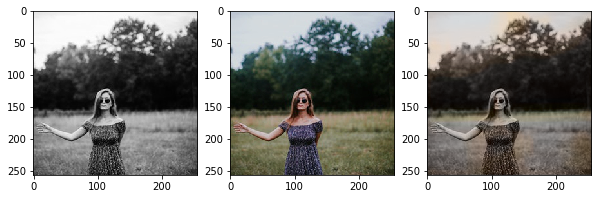

(256, 256, 1) (1000,)


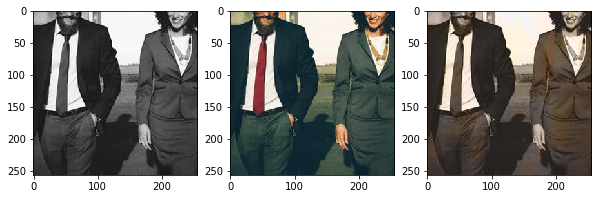

(256, 256, 1) (1000,)


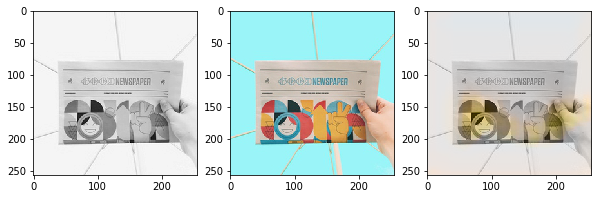

(256, 256, 1) (1000,)


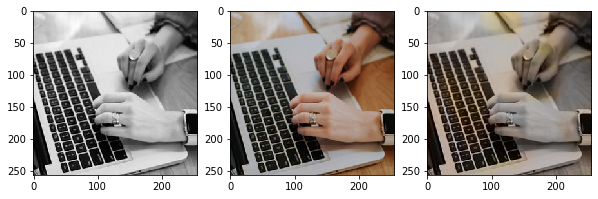

In [13]:
for i in range(5):
    l, ab = next(test_gen)
    compare_model_label(model, l, ab)